In [1]:
# import some necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import re


[nltk_data] Downloading package punkt to C:\Users\Lavy
[nltk_data]     Ngo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Lavy
[nltk_data]     Ngo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
path = r'C:\Users\Lavy Ngo\Desktop\CS5530\Assignment3\data_clean\clean_data.csv'

# read data from a raw file
data = pd.read_csv(path)

data

,UserID,UserScreenName,Location,TweetAt (dd-mm-yyyy),OriginalTweet,Sentiment
0,1,44953,NYC,2/3/2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",2/3/2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,2/3/2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",3/3/2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [3]:
# copy 'OriginalTweet' column 
tweet_data = data[['OriginalTweet']].copy()

tweet_data

,OriginalTweet
0,TRENDING: New Yorkers encounter empty supermar...
1,When I couldn't find hand sanitizer at Fred Me...
2,Find out how you can protect yourself and love...
3,#Panic buying hits #NewYork City as anxious sh...
4,#toiletpaper #dunnypaper #coronavirus #coronav...
...,...
3793,Meanwhile In A Supermarket in Israel -- People...
3794,Did you panic buy a lot of non-perishable item...
3795,Asst Prof of Economics @cconces was on @NBCPhi...
3796,Gov need to do somethings instead of biar je r...


In [4]:
# Drop unwanted values (NaN) and convert into string
tweet_data['OriginalTweet'].dropna(inplace=True)
tweet_data['OriginalTweet'] = tweet_data['OriginalTweet'].astype(str)

tweet_data

,OriginalTweet
0,TRENDING: New Yorkers encounter empty supermar...
1,When I couldn't find hand sanitizer at Fred Me...
2,Find out how you can protect yourself and love...
3,#Panic buying hits #NewYork City as anxious sh...
4,#toiletpaper #dunnypaper #coronavirus #coronav...
...,...
3793,Meanwhile In A Supermarket in Israel -- People...
3794,Did you panic buy a lot of non-perishable item...
3795,Asst Prof of Economics @cconces was on @NBCPhi...
3796,Gov need to do somethings instead of biar je r...


In [5]:
# Tokenize the text corpus
tweet_data['Tokenize'] = tweet_data['OriginalTweet'].apply(
    lambda x: [item for item in nltk.word_tokenize(x) if item.isalpha()])

tweet_data

,OriginalTweet,Tokenize
0,TRENDING: New Yorkers encounter empty supermar...,"[TRENDING, New, Yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,"[When, I, could, find, hand, sanitizer, at, Fr..."
2,Find out how you can protect yourself and love...,"[Find, out, how, you, can, protect, yourself, ..."
3,#Panic buying hits #NewYork City as anxious sh...,"[Panic, buying, hits, NewYork, City, as, anxio..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,"[toiletpaper, dunnypaper, coronavirus, coronav..."
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,"[Meanwhile, In, A, Supermarket, in, Israel, Pe..."
3794,Did you panic buy a lot of non-perishable item...,"[Did, you, panic, buy, a, lot, of, items, ECHO..."
3795,Asst Prof of Economics @cconces was on @NBCPhi...,"[Asst, Prof, of, Economics, cconces, was, on, ..."
3796,Gov need to do somethings instead of biar je r...,"[Gov, need, to, do, somethings, instead, of, b..."


In [6]:
# stop word removal (only English is approved)
stop_word = set(stopwords.words('english'))
tweet_data['Removal'] = tweet_data['Tokenize'].apply(lambda x: [item for item in x if item.lower() not in stop_word])

# specical character removal
tweet_data['Removal'] = tweet_data['Removal'].apply(lambda tweet_token: [re.sub(r'[^A-Za-z0-9]+', '', word) for word in tweet_token])

tweet_data


,OriginalTweet,Tokenize,Removal
0,TRENDING: New Yorkers encounter empty supermar...,"[TRENDING, New, Yorkers, encounter, empty, sup...","[TRENDING, New, Yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,"[When, I, could, find, hand, sanitizer, at, Fr...","[could, find, hand, sanitizer, Fred, Meyer, tu..."
2,Find out how you can protect yourself and love...,"[Find, out, how, you, can, protect, yourself, ...","[Find, protect, loved, ones, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,"[Panic, buying, hits, NewYork, City, as, anxio...","[Panic, buying, hits, NewYork, City, anxious, ..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav..."
...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,"[Meanwhile, In, A, Supermarket, in, Israel, Pe...","[Meanwhile, Supermarket, Israel, People, dance..."
3794,Did you panic buy a lot of non-perishable item...,"[Did, you, panic, buy, a, lot, of, items, ECHO...","[panic, buy, lot, items, ECHO, needs, food, do..."
3795,Asst Prof of Economics @cconces was on @NBCPhi...,"[Asst, Prof, of, Economics, cconces, was, on, ...","[Asst, Prof, Economics, cconces, NBCPhiladelph..."
3796,Gov need to do somethings instead of biar je r...,"[Gov, need, to, do, somethings, instead, of, b...","[Gov, need, somethings, instead, biar, je, rak..."


In [7]:
# Create a dictionary of word frequencies
word_freq = {}
for tweet_tokens in tweet_data['Removal']:
    for word in tweet_tokens:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

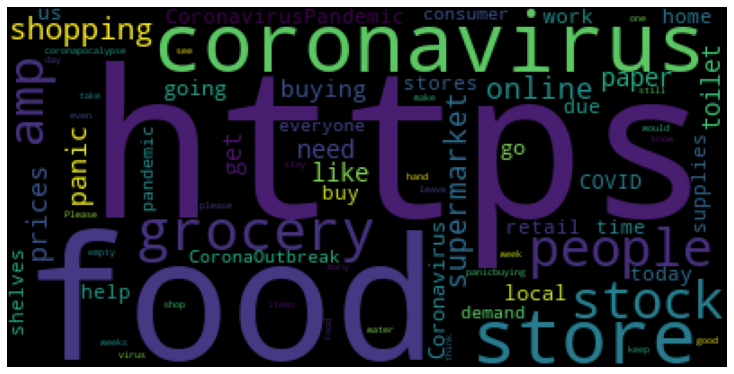

In [9]:
# Create a word cloud
wordcloud = WordCloud(background_color='black', max_words=70).generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
